# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



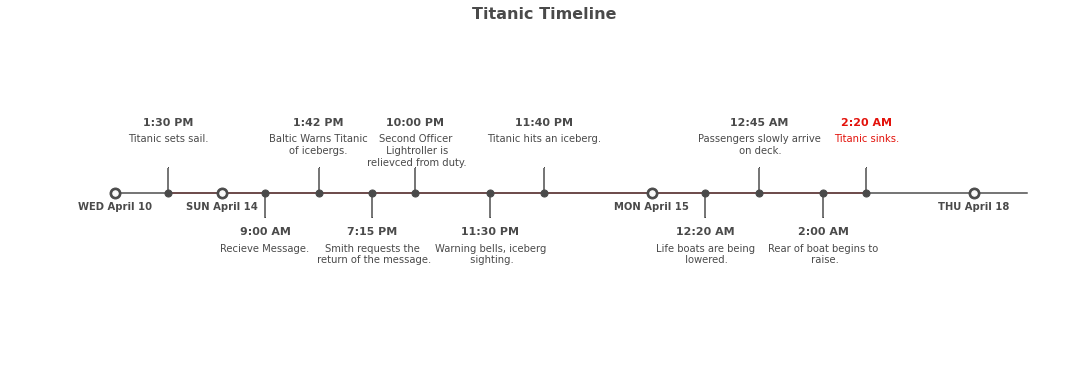

In [4]:
from datetime import datetime

# The dates of departure from different ports in a list
tl_dates = [
    "WED April 10",
    "SUN April 14",
    "MON April 15",
    "THU April 18"
]

# The space between dates so 
# 1 corresponds to WED April 10 and 9 to THU April 18
tl_x = [1, 2, 6, 9]

# The hours are given x values in a line
tl_sub_x = [1.5, 2.4, 2.9, 3.4, 3.8, 4.5, 5.0, 6.5, 7, 7.6, 8]
tl_sub_times = [
    "1:30 PM",
    "9:00 AM",
    "1:42 PM",
    "7:15 PM",
    "10:00 PM",
    "11:30 PM",
    "11:40 PM",
    "12:20 AM",
    "12:45 AM",
    "2:00 AM",
    "2:20 AM",
]

# The meticulous description of the relevant events of the titanic
tl_text = [
    "Titanic sets sail.",
    "Recieve Message.",
    "Baltic Warns Titanic\nof icebergs.", 
    "Smith requests the\n return of the message.",
    "Second Officer\n Lightroller is\n relievced from duty.",
    "Warning bells, iceberg\n sighting.",
    "Titanic hits an iceberg.",
    "Life boats are being\n lowered.",
    "Passengers slowly arrive\n on deck.",
    "Rear of boat begins to\n raise.",
    "Titanic sinks."
]

# Literally drawing the figure and setting the axes
# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 5), constrained_layout=True)
ax.set_ylim(-2, 2)
ax.set_xlim(0, 10)


# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.95, c='#4a4a4a', zorder=1)
# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.2, date, ha='center', 
            fontfamily='sans serif', fontweight='bold',
            color='#4a4a4a')
    

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels, use_line_collection=True)    
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='sans serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='sans serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#e3120b')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Titanic Timeline", fontweight="bold", fontfamily='sans serif', fontsize=16, color='#4a4a4a')

plt.show()

# Preparations

## Importing libraries

In [5]:
# Import libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.model_selection as ms 
from IPython.display import Image
from IPython.core.display import HTML 
import re 
import seaborn as sns
import plotly.express as px 
from plotly.subplots import make_subplots

## Loading data

In [6]:
# I am going to obtain my dataset from my personal drive account

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [7]:
titanic = pd.read_csv('/content/drive/MyDrive/upgrade-hub_Data_Analytics/Modulo1/220620_Titanic/titanic.csv')

# Preprocessing of DATA

In [8]:
# Let's have a look at the data

print(f"The titanic dataset contains {titanic.shape[0]} rows and {titanic.shape[1]} columns")
titanic.info


The titanic dataset contains 891 rows and 12 columns


<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [9]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
# Let's get the number of empty values:
missing_data = titanic.isnull().sum(axis = 0)
missing_data = missing_data[missing_data > 0]
percentage_missing = missing_data / titanic.shape[0]*100
titanic_missing = pd.DataFrame()
titanic_missing["Count (n)"] = missing_data
titanic_missing["Percentage (%)"] = percentage_missing
print(titanic_missing.sort_values(by = "Count (n)", ascending = False))


          Count (n)  Percentage (%)
Cabin           687       77.104377
Age             177       19.865320
Embarked          2        0.224467


In [11]:
# Given that "Cabin" data is missing in great amounts, the column is deleted:
titanic = titanic.drop(["Cabin"], axis = 1)
titanic.shape

(891, 11)

In [12]:
# It is decided that "Age" and "Embarked" are still useful. 
# No modifications to the data are made. Transparency about the data is considered a priority

In [13]:
# Minimum and maximum age
# It is observed that for values below 1, the numbers might be typos.
# This is probaby a typing mistake so the values are multiplied by 100.
titanic["Age"].sort_values(ascending = False)
titanic_age = titanic["Age"]
titanic_wrong = titanic_age[titanic_age < 1]
titanic_wrong = titanic_wrong *100

titanic.loc[titanic["Age"] < 1, "Age"] = titanic["Age"]*100
print(titanic["Age"].sort_values())


381    1.0
164    1.0
183    1.0
788    1.0
172    1.0
      ... 
859    NaN
863    NaN
868    NaN
878    NaN
888    NaN
Name: Age, Length: 891, dtype: float64


In [14]:
# Now we will represent the age vs the survival. 
# Code obtained from: https://www.kaggle.com/code/subinium/awesome-visualization-with-titanic-dataset/notebook

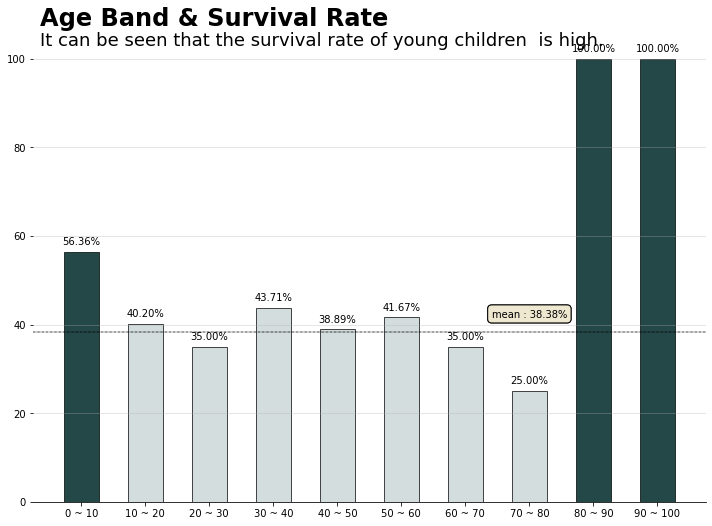

In [15]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} ~ {i*10}'

titanic['age_band'] = titanic['Age'].apply(age_band)
titanic_age = titanic[['age_band', 'Survived']].groupby('age_band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(9)]
color_map[0] = color_map[8] = '#244747' # color highlight

ax.bar(titanic_age['Survival rate'].index, titanic_age['Survival rate'], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)



for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)


# Annotation Part
for i in titanic_age['Survival rate'].index:
    ax.annotate(f"{titanic_age['Survival rate'][i]:.02f}%", 
                   xy=(i, titanic_age['Survival rate'][i] + 2.3),
                   va = 'center', ha='center',fontweight='light', 
                   color='#000000')


# mean line + annotation
mean = titanic['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth = 0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#000000',
            bbox = dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=1))

#4a4a4a previous color of mean text

# median line
median = titanic["Age"].median()
ax.axhline(mean ,color='black', linewidth = 0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=('70 ~ 80', mean + 4),
            va = 'center', ha='center',
            color='#000000',
            bbox = dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=1))

# Title & Subtitle    
fig.text(0.06, 1, 'Age Band & Survival Rate', fontsize = 24, fontweight = 'bold', fontfamily='sans serif')
fig.text(0.06, 0.96, 'It can be seen that the survival rate of young children  is high.', fontsize=18, fontweight='light', fontfamily='sans serif')

grid_y_ticks = np.arange(0, 101, 20)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.tight_layout()
plt.show()

In [16]:
survival_rate = titanic.groupby(['Sex']).mean()[['Survived']]
male_rate = survival_rate.loc['male']
female_rate = survival_rate.loc['female']
display(survival_rate)

,Survived
Sex,
female,0.742038
male,0.188908


In [17]:
male_pos = np.random.uniform(0, male_rate, len(titanic[(titanic['Sex']=='male') & (titanic['Survived']==1)]))
male_neg = np.random.uniform(male_rate, 1, len(titanic[(titanic['Sex']=='male') & (titanic['Survived']==0)]))
female_pos = np.random.uniform(0, female_rate, len(titanic[(titanic['Sex']=='female') & (titanic['Survived']==1)]))
female_neg = np.random.uniform(female_rate, 1, len(titanic[(titanic['Sex']=='female') & (titanic['Survived']==0)]))

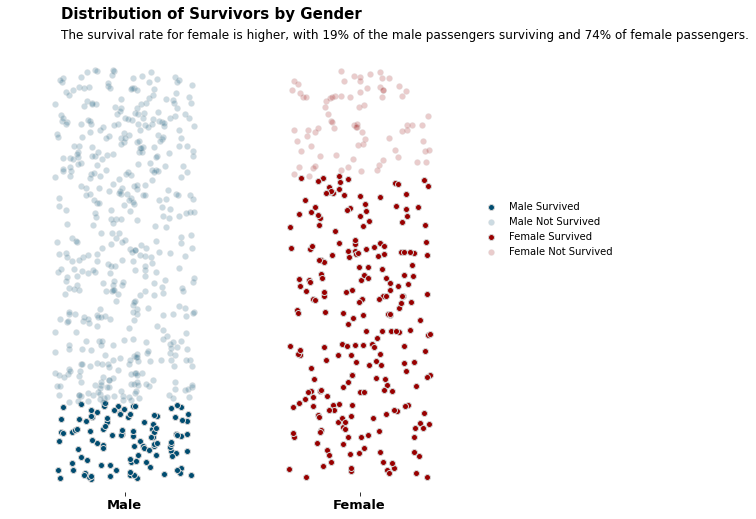

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(53)

# Male Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_pos)), male_pos, color='#004c70', edgecolor='lightgray', label='Male Survived')
ax.scatter(np.random.uniform(-0.3, 0.3, len(male_neg)), male_neg, color='#004c70', edgecolor='lightgray', alpha=0.2, label='Male Not Survived')

# Female Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_pos)), female_pos, color='#990000', edgecolor='lightgray', label='Female Survived')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(female_neg)), female_neg, color='#990000', edgecolor='lightgray', alpha=0.2, label='Female Not Survived')

# Set Figure & Axes
ax.set_xlim(-0.5, 2.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1])
ax.set_xticklabels(['Male', 'Female'], fontweight='bold', fontfamily='sans serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Gender', fontweight='bold', fontfamily='sans serif', fontsize=15)    
fig.text(0.1, 0.96, 'The survival rate for female is higher, with 19% of the male passengers surviving and 74% of female passengers.', fontweight='light', fontfamily='sans serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


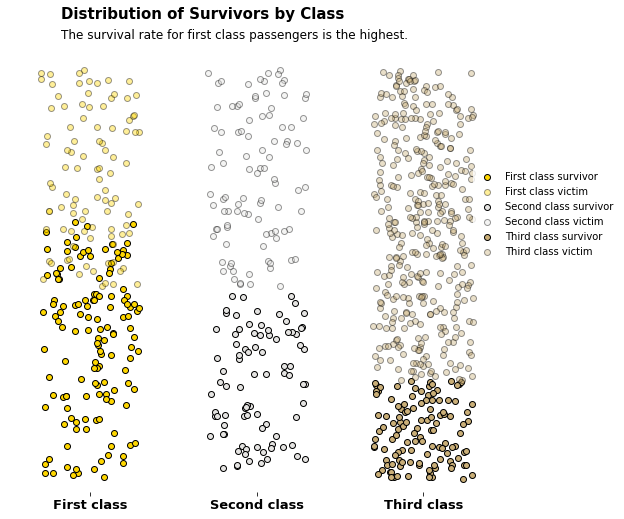

In [19]:
survival_rate = titanic.groupby(['Pclass']).mean()[['Survived']]
class1_rate = survival_rate.loc[1]
class2_rate = survival_rate.loc[2]
class3_rate = survival_rate.loc[3]
display(survival_rate)
class1_pos = np.random.uniform(0, class1_rate, len(titanic[(titanic['Pclass']== 1) & (titanic['Survived']==1)]))
class1_neg = np.random.uniform(class1_rate, 1, len(titanic[(titanic['Pclass']== 1) & (titanic['Survived']==0)]))
class2_pos = np.random.uniform(0, class2_rate, len(titanic[(titanic['Pclass']== 2) & (titanic['Survived']==1)]))
class2_neg = np.random.uniform(class2_rate, 1, len(titanic[(titanic['Pclass']== 2) & (titanic['Survived']==0)]))
class3_pos = np.random.uniform(0, class3_rate, len(titanic[(titanic['Pclass']== 3) & (titanic['Survived']==1)]))
class3_neg = np.random.uniform(class3_rate, 1, len(titanic[(titanic['Pclass']== 3) & (titanic['Survived']==0)]))
fig, ax = plt.subplots(1, 1, figsize=(9, 7))

np.random.seed(53)

# Class1 Stripplot
ax.scatter(np.random.uniform(-0.3, 0.3, len(class1_pos)), class1_pos, color='#ffd700', edgecolor='black', label='First class survivor')
ax.scatter(np.random.uniform(-0.3, 0.3, len(class2_neg)), class2_neg, color='#ffd700', edgecolor='black', alpha=0.4, label='First class victim')

# Class2 Stripplot
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(class2_pos)), class2_pos, color='#e5e4e2', edgecolor='black', label='Second class survivor')
ax.scatter(1+np.random.uniform(-0.3, 0.3, len(class2_neg)), class2_neg, color='#e5e4e2', edgecolor='black', alpha=0.4, label='Second class victim')

# Class3 Stripplot
ax.scatter(2+np.random.uniform(-0.3, 0.3, len(class3_pos)), class3_pos, color='#caaf78', edgecolor='black', label='Third class survivor')
ax.scatter(2+np.random.uniform(-0.3, 0.3, len(class3_neg)), class3_neg, color='#caaf78', edgecolor='black', alpha=0.4, label='Third class victim')


# Set Figure & Axes
ax.set_xlim(-0.5, 3.0)
ax.set_ylim(-0.03, 1.1)

# Ticks
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['First class', 'Second class', "Third class"], fontweight='bold', fontfamily='sans serif', fontsize=13)
ax.set_yticks([], minor=False)
ax.set_ylabel('')

# Spines
for s in ["top","right","left", 'bottom']:
    ax.spines[s].set_visible(False)


# Title & Explanation
fig.text(0.1, 1, 'Distribution of Survivors by Class', fontweight='bold', fontfamily='sans serif', fontsize=15)    
fig.text(0.1, 0.96, 'The survival rate for first class passengers is the highest.', fontweight='light', fontfamily='sans serif', fontsize=12)    

ax.legend(loc=(0.8, 0.5), edgecolor='None')
plt.tight_layout()
plt.show()

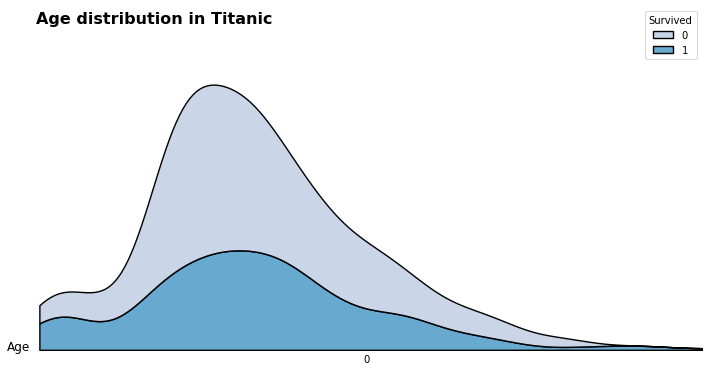

In [20]:
#falta posar la línia de temps dels 0 als 80 anys

fig = plt.figure(figsize=(12, 12))
gs = fig.add_gridspec(3,1)
gs.update(hspace= -0.55)

axes = list()
colors = ["#022133", "#5c693b", "#51371c"]

for idx, cls, c in zip(range(1), sorted(titanic), colors):
    axes.append(fig.add_subplot(gs[idx, 0]))
    
    # you can also draw density plot with matplotlib + scipy.
    sns.kdeplot(x='Age', data = titanic, 
                fill = True, cut=0, bw_method=0.25, 
                lw=1.4, edgecolor='black', hue='Survived', 
                multiple="stack", palette='PuBu', alpha=0.7
               ) 
    
    axes[idx].set_ylim(0, 0.04)
    axes[idx].set_xlim(0, 85)
    
    axes[idx].set_yticks([])
    axes[idx].set_xticks([0,10,20,30,40,50,60,70,80,90])
    axes[idx].set_xticklabels(["first class"], fontweight='bold', fontfamily='sans serif', fontsize=13)

    if idx != 2 : axes[idx].set_xticks([])
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('0')
    
    spines = ["top","right","left","bottom"]
    for s in spines:
        axes[idx].spines[s].set_visible(False)
        
    #axes[idx].patch.set_alpha(0)
    axes[idx].text(-0.2,0,f'Age',fontweight="light", fontfamily='sans serif', fontsize=12,ha="right")
    axes[idx].get_legend()
        
fig.text(0.13,0.86,"Age distribution in Titanic", fontweight="bold", fontfamily='sans serif', fontsize=16)

plt.show()

# Machine learning

# Analysis of the data

In [21]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20 ~ 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30 ~ 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20 ~ 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30 ~ 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30 ~ 40
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,20 ~ 30
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,10 ~ 20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,None
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,20 ~ 30


In [22]:
# we shuffle the dataframe
train = titanic
print(train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [23]:
# The data is somewhat preprocessed:
pd.get_dummies(titanic["Embarked"])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [24]:
titanic['Sex'] = titanic['Sex'].map({'male':0, 'female':1})
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic['Embarked'] = titanic['Embarked'].map({'S':0, 'C':1, 'Q':2})
#titanic['Family'] = titanic['SibSp'] + data['Parch']
titanic = titanic[[col for col in titanic.columns if col !='Survived']+ ['Survived']]  
corr = titanic.corr()
corr

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,1.000000,-0.035144,-0.042939,0.050091,-0.057527,-0.001652,0.012658,-0.030467,-0.005007
Pclass,-0.035144,1.000000,-0.131900,-0.361164,0.083081,0.018443,-0.549500,0.045702,-0.338481
Sex,-0.042939,-0.131900,1.000000,-0.098104,0.114631,0.245489,0.182333,0.116569,0.543351
Age,0.050091,-0.361164,-0.098104,1.000000,-0.271786,-0.132686,0.100671,0.020096,-0.017010
SibSp,-0.057527,0.083081,0.114631,-0.271786,1.000000,0.414838,0.159651,-0.059961,-0.035322
Parch,-0.001652,0.018443,0.245489,-0.132686,0.414838,1.000000,0.216225,-0.078665,0.081629
Fare,0.012658,-0.549500,0.182333,0.100671,0.159651,0.216225,1.000000,0.062142,0.257307
Embarked,-0.030467,0.045702,0.116569,0.020096,-0.059961,-0.078665,0.062142,1.000000,0.106811
Survived,-0.005007,-0.338481,0.543351,-0.017010,-0.035322,0.081629,0.257307,0.106811,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


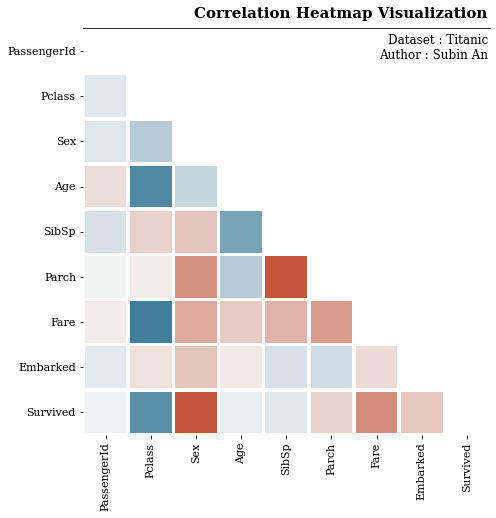

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, 
            ax=ax)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap Visualization', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.97, 0.92, 'Dataset : Titanic\nAuthor : Subin An', fontweight='light', fontfamily='serif', fontsize=12, ha='right')    

plt.tight_layout()
plt.show()